In [203]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [204]:
for i in range(55):
    if i==0:  #SNLI/TRAIN10000/TRAIN
        train = pd.read_pickle('salida/nuevo4h/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4h/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [205]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,1.242375,2.156780,2.121928,3.793043,0.004627,0.226893,0.082562,4.251276,0.001710,0.613446,...,2,5,0.500000,0.315587,0,,0,,0.50,neutral
1,1.362675,1.543752,1.338269,3.938872,0.006773,0.071555,0.006916,4.157277,0.003623,0.303667,...,3,5,0.250000,0.085344,0,,0,,0.25,contradiction
2,1.354370,1.640224,1.370951,3.895909,0.004943,0.082896,0.034248,4.438309,0.001217,0.694298,...,1,5,0.666667,0.335940,0,,0,,1.00,entailment
3,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,4.292915,0.001417,0.763564,...,0,4,0.500000,0.000000,0,,0,,0.00,neutral
4,1.365683,1.405639,1.000000,3.869048,0.004221,0.067400,0.046895,4.324714,0.001546,0.533700,...,1,4,0.500000,0.207519,0,,0,,0.00,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549362,1.000007,1.356343,0.918296,3.782035,0.005270,0.091182,0.023234,3.942525,0.003351,0.409812,...,3,4,0.333333,0.275025,0,,0,,0.00,contradiction
549363,1.000015,1.314536,1.143156,3.811096,0.005172,0.098681,0.034644,4.107884,0.002492,0.399121,...,6,4,0.222222,0.161168,0,,0,,1.00,neutral
549364,1.290847,2.015061,1.384432,3.624098,0.006082,0.166868,0.019184,4.071102,0.002289,0.648562,...,2,6,0.400000,0.424965,0,,0,,0.50,neutral
549365,1.390492,1.603158,0.650022,3.801681,0.005378,0.033230,-0.008701,3.909436,0.002983,0.276556,...,2,6,0.333333,0.312112,0,,0,,0.25,contradiction


In [206]:
# train.head(20)

In [207]:
# train[train["clases"]=="contradiction"]

In [208]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
train["mutinf"]=train["mutinf_t"]-train["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
train["max_info"]=train["max_info_t"]-train["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
train["entropias"]=train["entropia_total"]-train["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
train["sumas"]=train["sumas_t"]-train["sumas"]
train["list_m"]=train["list_m"]/train["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]
train=train.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
                  "mearts_t","sumas_t","list_M","mearts"],axis=1)
#train["meartsx"]=train["mearts"]*train["distancias"]

In [210]:
#train.boxplot(by="clases",column=["meartsx","mearts"])

<Axes: title={'center': 'distancias'}, xlabel='clases'>

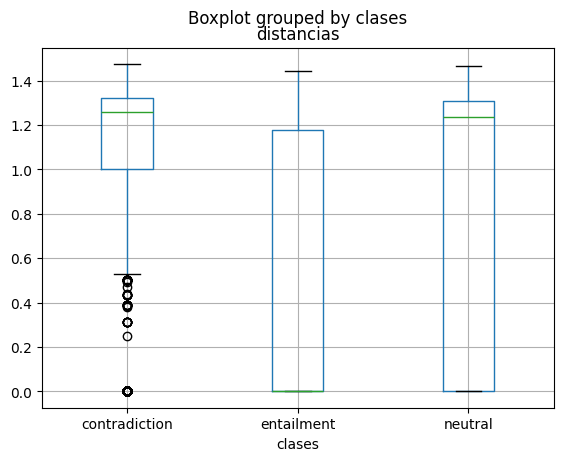

In [211]:
train.boxplot(by="clases",column=["distancias"])

In [212]:
#checar=["meartsx","mearts","distancias"]

In [200]:
import scipy.stats as stats
for c in checar:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="neutral")][c]
    grupo_b = train[(train['clases']=="entailment")][c]
    grupo_c = train[(train['clases']=="contradiction")][c]

    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"neutral-entailment")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"neutral-entailment")
    
    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_b, grupo_c)

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"entailment-contradiction")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"entailment-contradiction")
    
    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_c)

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"neutral-contradiction")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"neutral-contradiction")

Hay una diferencia significativa entre los grupos. meartsx 0.0 neutral-entailment
Hay una diferencia significativa entre los grupos. meartsx 0.0 entailment-contradiction
Hay una diferencia significativa entre los grupos. meartsx 6.147372171268611e-16 neutral-contradiction
Hay una diferencia significativa entre los grupos. mearts 0.0 neutral-entailment
Hay una diferencia significativa entre los grupos. mearts 0.0 entailment-contradiction
Hay una diferencia significativa entre los grupos. mearts 9.4505183097668e-08 neutral-contradiction
Hay una diferencia significativa entre los grupos. distancias 0.0 neutral-entailment
Hay una diferencia significativa entre los grupos. distancias 0.0 entailment-contradiction
Hay una diferencia significativa entre los grupos. distancias 1.2124350344076888e-137 neutral-contradiction


In [201]:
for c in checar:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="neutral")][c]
    grupo_b = train[(train['clases']=="entailment")][c]
    grupo_c = train[(train['clases']=="contradiction")][c]

    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.mannwhitneyu(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"neutral-entailment")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"neutral-entailment")
    
    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_b, grupo_c)

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"entailment-contradiction")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"entailment-contradiction")
    
    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_c)

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor,"neutral-contradiction")
        #pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"neutral-contradiction")

Hay una diferencia significativa entre los grupos. meartsx 0.0 neutral-entailment
Hay una diferencia significativa entre los grupos. meartsx 0.0 entailment-contradiction
Hay una diferencia significativa entre los grupos. meartsx 6.147372171268611e-16 neutral-contradiction
Hay una diferencia significativa entre los grupos. mearts 0.0 neutral-entailment
Hay una diferencia significativa entre los grupos. mearts 0.0 entailment-contradiction
Hay una diferencia significativa entre los grupos. mearts 9.4505183097668e-08 neutral-contradiction
Hay una diferencia significativa entre los grupos. distancias 0.0 neutral-entailment
Hay una diferencia significativa entre los grupos. distancias 0.0 entailment-contradiction
Hay una diferencia significativa entre los grupos. distancias 1.2124350344076888e-137 neutral-contradiction


In [7]:
train=train.drop(["verbT","verbH"],axis=1)

In [213]:
train.columns

Index(['distancias', 'entropias', 'mutinf', 'max_info', 'sumas', 'entail',
       'contra', 'neutral', 'no_match', 'rel_conceptuales', 'list_comp',
       'diferencias', 'list_incomp', 'entropia_relaciones', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent', 'clases'],
      dtype='object')

<Axes: title={'center': 'entropia_relaciones'}, xlabel='clases'>

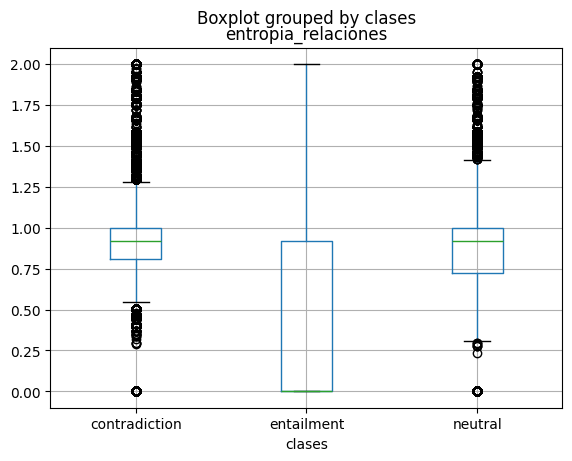

In [214]:
train.boxplot(by="clases",column="entropia_relaciones")

## Eliminar características

In [215]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["verbH","verbT","entropias","list_m","distancias"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropias,mutinf,max_info,sumas,entail,contra,neutral,no_match,rel_conceptuales,...,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,1.242375,0.034852,0.458233,0.386554,0.085855,0.500000,0.0,0.000000,0.500000,0,...,0.400000,0,1.000000,0.500000,5,0.500000,0,0,0.50,neutral
1,1.362675,0.205483,0.218404,0.232111,0.059762,0.250000,0.0,0.000000,0.750000,0,...,0.600000,0,0.811278,0.750000,5,0.250000,0,0,0.25,contradiction
2,1.354370,0.269273,0.542400,0.611403,0.146683,0.666667,0.0,0.000000,0.333333,0,...,0.200000,0,0.918296,0.333333,5,0.666667,0,0,1.00,entailment
3,0.000000,2.500000,4.292915,0.763564,0.237017,0.500000,0.5,0.000000,0.000000,0,...,0.000000,1,1.000000,0.000000,4,0.500000,0,0,0.00,neutral
4,1.365683,0.405639,0.455666,0.466300,0.104005,0.500000,0.0,0.000000,0.500000,0,...,0.250000,0,1.000000,0.500000,4,0.500000,0,0,0.00,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549362,1.000007,0.438047,0.160490,0.318630,0.080727,0.500000,0.0,0.000000,0.500000,0,...,0.750000,0,1.000000,0.500000,4,0.333333,0,0,0.00,contradiction
549363,1.000015,0.171381,0.296788,0.300440,0.073633,0.333333,0.0,0.000000,0.666667,0,...,1.500000,0,0.918296,0.666667,4,0.222222,0,0,1.00,neutral
549364,1.290847,0.630630,0.447004,0.481694,0.101914,0.400000,0.0,0.200000,0.400000,1,...,0.333333,0,1.521928,0.400000,6,0.400000,0,0,0.50,neutral
549365,1.390492,0.953135,0.107755,0.243327,0.055975,0.666667,0.0,0.000000,0.333333,0,...,0.333333,0,0.918296,0.333333,6,0.333333,0,0,0.25,contradiction


In [216]:
train.columns

Index(['distancias', 'entropias', 'mutinf', 'max_info', 'sumas', 'entail',
       'contra', 'neutral', 'no_match', 'rel_conceptuales', 'list_comp',
       'diferencias', 'list_incomp', 'entropia_relaciones', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent', 'clases'],
      dtype='object')

In [217]:
#train = train[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]

In [218]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [219]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [220]:
train_m

,distancias,entropias,mutinf,max_info,sumas,entail,contra,neutral,no_match,rel_conceptuales,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
distancias,1.000000,-0.850677,-0.979908,-0.751231,-0.657779,-0.666545,-0.046080,-0.111497,0.792381,-0.038661,-0.027604,0.652290,-0.025406,0.700095,0.791412,-0.005752,-0.426525,0.001216,0.075848,-0.326540
entropias,-0.850677,1.000000,0.880727,0.789035,0.765849,0.675918,0.047787,0.118898,-0.806967,0.069386,0.072061,-0.617940,0.035567,-0.583334,-0.806423,-0.059938,0.450081,-0.004583,-0.047907,0.334242
mutinf,-0.979908,0.880727,1.000000,0.837242,0.727474,0.710121,0.028130,0.070654,-0.812445,0.003625,-0.033501,-0.659264,0.008965,-0.719943,-0.811661,-0.003945,0.472101,-0.001617,-0.071422,0.400067
max_info,-0.751231,0.789035,0.837242,1.000000,0.824590,0.793109,-0.017976,-0.098644,-0.797901,-0.125409,-0.233675,-0.630818,-0.023940,-0.640703,-0.798170,0.008418,0.613717,-0.001350,-0.045589,0.618942
sumas,-0.657779,0.765849,0.727474,0.824590,1.000000,0.639029,-0.009796,-0.030207,-0.670825,-0.070549,-0.163601,-0.466242,-0.022695,-0.539374,-0.671230,-0.308584,0.478933,-0.011546,-0.035275,0.464091
entail,-0.666545,0.675918,0.710121,0.793109,0.639029,1.000000,-0.186741,-0.353968,-0.837250,-0.335657,0.202658,-0.653471,-0.174820,-0.706410,-0.836950,0.033334,0.654382,-0.002847,-0.039615,0.506357
contra,-0.046080,0.047787,0.028130,-0.017976,-0.009796,-0.186741,1.000000,-0.030122,-0.053670,-0.028804,-0.064814,-0.046879,0.923875,0.219076,-0.053601,0.002509,-0.120775,0.001034,0.000599,-0.087587
neutral,-0.111497,0.118898,0.070654,-0.098644,-0.030207,-0.353968,-0.030122,1.000000,-0.150828,0.902836,-0.074347,-0.102390,-0.026521,0.419723,-0.150564,-0.008075,-0.219709,-0.000369,-0.019214,-0.188124
no_match,0.792381,-0.806967,-0.812445,-0.797901,-0.670825,-0.837250,-0.053670,-0.150828,1.000000,-0.118376,-0.160938,0.773556,-0.047815,0.475957,0.999515,-0.032296,-0.554719,0.002992,0.052999,-0.421030
rel_conceptuales,-0.038661,0.069386,0.003625,-0.125409,-0.070549,-0.335657,-0.028804,0.902836,-0.118376,1.000000,-0.006941,-0.036133,-0.012492,0.482346,-0.118279,0.027045,-0.202281,-0.000671,-0.009492,-0.177977


<Axes: >

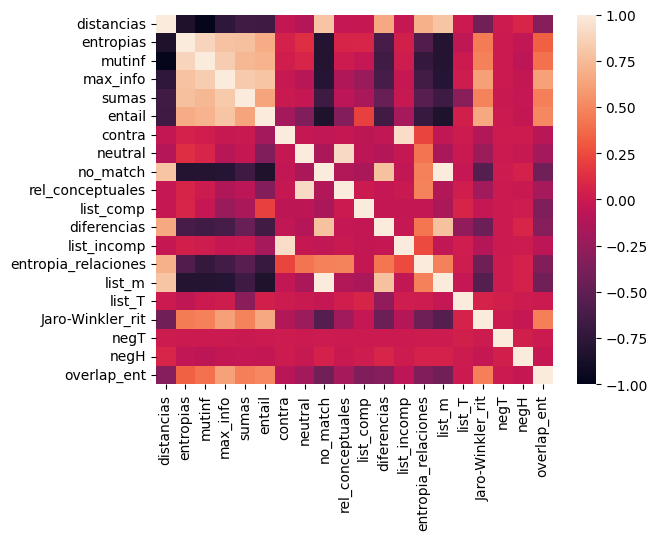

In [221]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [222]:
train_m

,distancias,entropias,mutinf,max_info,sumas,entail,contra,neutral,no_match,rel_conceptuales,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
distancias,1.000000,-0.850677,-0.979908,-0.751231,-0.657779,-0.666545,-0.046080,-0.111497,0.792381,-0.038661,-0.027604,0.652290,-0.025406,0.700095,0.791412,-0.005752,-0.426525,0.001216,0.075848,-0.326540
entropias,-0.850677,1.000000,0.880727,0.789035,0.765849,0.675918,0.047787,0.118898,-0.806967,0.069386,0.072061,-0.617940,0.035567,-0.583334,-0.806423,-0.059938,0.450081,-0.004583,-0.047907,0.334242
mutinf,-0.979908,0.880727,1.000000,0.837242,0.727474,0.710121,0.028130,0.070654,-0.812445,0.003625,-0.033501,-0.659264,0.008965,-0.719943,-0.811661,-0.003945,0.472101,-0.001617,-0.071422,0.400067
max_info,-0.751231,0.789035,0.837242,1.000000,0.824590,0.793109,-0.017976,-0.098644,-0.797901,-0.125409,-0.233675,-0.630818,-0.023940,-0.640703,-0.798170,0.008418,0.613717,-0.001350,-0.045589,0.618942
sumas,-0.657779,0.765849,0.727474,0.824590,1.000000,0.639029,-0.009796,-0.030207,-0.670825,-0.070549,-0.163601,-0.466242,-0.022695,-0.539374,-0.671230,-0.308584,0.478933,-0.011546,-0.035275,0.464091
entail,-0.666545,0.675918,0.710121,0.793109,0.639029,1.000000,-0.186741,-0.353968,-0.837250,-0.335657,0.202658,-0.653471,-0.174820,-0.706410,-0.836950,0.033334,0.654382,-0.002847,-0.039615,0.506357
contra,-0.046080,0.047787,0.028130,-0.017976,-0.009796,-0.186741,1.000000,-0.030122,-0.053670,-0.028804,-0.064814,-0.046879,0.923875,0.219076,-0.053601,0.002509,-0.120775,0.001034,0.000599,-0.087587
neutral,-0.111497,0.118898,0.070654,-0.098644,-0.030207,-0.353968,-0.030122,1.000000,-0.150828,0.902836,-0.074347,-0.102390,-0.026521,0.419723,-0.150564,-0.008075,-0.219709,-0.000369,-0.019214,-0.188124
no_match,0.792381,-0.806967,-0.812445,-0.797901,-0.670825,-0.837250,-0.053670,-0.150828,1.000000,-0.118376,-0.160938,0.773556,-0.047815,0.475957,0.999515,-0.032296,-0.554719,0.002992,0.052999,-0.421030
rel_conceptuales,-0.038661,0.069386,0.003625,-0.125409,-0.070549,-0.335657,-0.028804,0.902836,-0.118376,1.000000,-0.006941,-0.036133,-0.012492,0.482346,-0.118279,0.027045,-0.202281,-0.000671,-0.009492,-0.177977


In [223]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,distancias,entropias,mutinf,max_info,sumas,entail,contra,neutral,no_match,rel_conceptuales,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
distancias,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
entropias,-0.850677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
mutinf,-0.979908,0.880727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max_info,-0.751231,0.789035,0.837242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
sumas,-0.657779,0.765849,0.727474,0.824590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
entail,-0.666545,0.675918,0.710121,0.793109,0.639029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
contra,-0.046080,0.047787,0.028130,-0.017976,-0.009796,-0.186741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
neutral,-0.111497,0.118898,0.070654,-0.098644,-0.030207,-0.353968,-0.030122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
no_match,0.792381,-0.806967,-0.812445,-0.797901,-0.670825,-0.837250,-0.053670,-0.150828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
rel_conceptuales,-0.038661,0.069386,0.003625,-0.125409,-0.070549,-0.335657,-0.028804,0.902836,-0.118376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [224]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

mutinf entropias 0.8807271383774348
max_info entropias 0.7890354093692008
max_info mutinf 0.8372416054740867
sumas entropias 0.765849144014877
sumas mutinf 0.7274743349320475
sumas max_info 0.8245895489262782
entail mutinf 0.7101208343852703
entail max_info 0.7931092179024246
no_match distancias 0.7923807696742852
rel_conceptuales neutral 0.9028359054217083
diferencias no_match 0.7735560521710481
list_incomp contra 0.9238749610229269
entropia_relaciones distancias 0.7000952878247403
list_m distancias 0.7914116245540925
list_m no_match 0.9995148092851202
list_m diferencias 0.7735287159300587


In [226]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

entropias distancias -0.8506765724909362
mutinf distancias -0.9799082612112472
max_info distancias -0.7512312356568329
no_match entropias -0.8069670777140876
no_match mutinf -0.8124453719542473
no_match max_info -0.7979011258190452
no_match entail -0.8372497543474013
entropia_relaciones mutinf -0.719943497481057
entropia_relaciones entail -0.7064096488352386
list_m entropias -0.8064228796591675
list_m mutinf -0.8116611659706583
list_m max_info -0.7981700160151719
list_m entail -0.8369498943399042


In [227]:
# Checar variables colineales
#sns.relplot(data=train_m, x="distancias", y="diferencias")

In [228]:
#X_dev = np.array(dev.drop(['CLASS'],axis=1))
#y_d = np.array(dev['CLASS'])

In [229]:
# SICK
y_train=[]
for i in y_:
    if i == "entailment":
        y_train.append(1)
    elif i == "neutral":
        y_train.append(2)
    else:
        y_train.append(0)

In [230]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

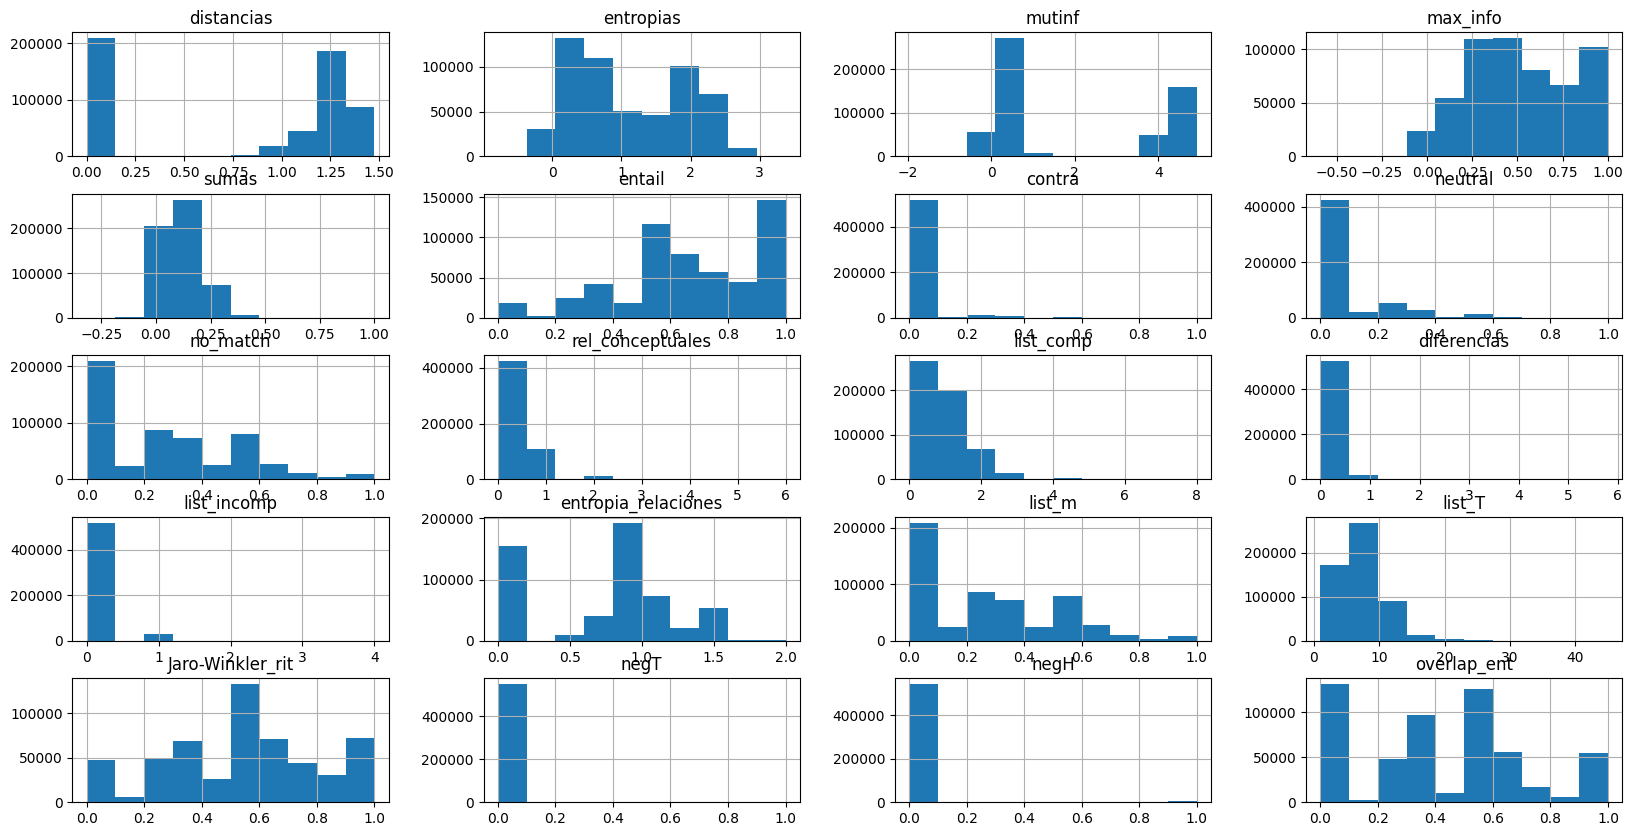

In [231]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [232]:
for i in range(10):
    if i==0:
        test = pd.read_pickle('salida/nuevo4h/SNLI/TEST/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4h/SNLI/TEST/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [233]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,1.356523,1.622886,0.979023,3.720471,0.005341,0.079564,0.023874,3.927563,0.002856,0.309673,...,3,9,0.250000,0.216259,0,,0,,0.250000,neutral
1,1.351523,2.637804,1.530493,3.683948,0.004802,0.086685,0.021847,4.265780,0.001134,0.695562,...,1,9,0.333333,0.733054,0,,0,,0.500000,entailment
2,1.260500,2.012763,0.986427,3.721150,0.004332,0.205498,0.034361,3.913399,0.002739,0.392654,...,2,9,0.250000,0.306015,0,,0,,0.333333,contradiction
3,1.191664,1.491315,1.405639,3.911284,0.007970,0.289942,0.081517,4.381176,0.003344,0.644971,...,1,8,0.500000,0.138675,0,,0,,0.500000,neutral
4,1.153839,1.439676,1.061278,3.859440,0.004270,0.334325,0.080644,4.413306,0.001032,0.778108,...,1,8,0.333333,0.333087,0,,0,,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,1.284206,2.121928,1.000000,3.864398,0.004332,0.175336,0.133268,4.233124,0.002346,0.534993,...,1,4,0.400000,1.321928,0,,0,,0.333333,contradiction
9814,0.000000,1.947339,0.000000,0.000000,0.000000,0.000000,0.000000,4.141572,0.002149,0.700668,...,0,4,1.000000,0.000000,0,,0,,0.333333,entailment
9815,1.353333,1.413582,0.811278,3.787320,0.004292,0.084199,0.030675,4.086125,0.002055,0.389466,...,2,8,0.333333,0.197276,0,,0,,0.333333,contradiction
9816,0.000000,1.956908,0.000000,0.000000,0.000000,0.000000,0.000000,4.673955,0.000000,1.000000,...,0,8,0.666667,0.000000,0,,0,,1.000000,entailment


In [234]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
test["mutinf"]=test["mutinf_t"]-test["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
test["max_info"]=test["max_info_t"]-test["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
test["entropias"]=test["entropia_total"]-test["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
test["sumas"]=test["sumas_t"]-test["sumas"]
test["list_m"]=test["list_m"]/test["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]
test=test.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
                  "mearts_t","sumas_t","list_M","mearts"],axis=1)
#train["meartsx"]=train["mearts"]*train["distancias"]

In [235]:
#test=test.drop(["verbT","verbH"],axis=1)

In [236]:
#test=test.drop(["verbH","verbT","entropias","list_m","distancias"],axis=1)
test

,distancias,entropias,mutinf,max_info,sumas,entail,contra,neutral,no_match,rel_conceptuales,...,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,1.356523,0.643863,0.207092,0.230109,0.080601,0.250000,0.0,0.00,0.750000,0,...,0.333333,0,0.811278,0.750000,9,0.250000,0,0,0.250000,neutral
1,1.351523,1.107311,0.581832,0.608876,0.228329,0.666667,0.0,0.00,0.333333,0,...,0.111111,0,0.918296,0.333333,9,0.333333,0,0,0.500000,entailment
2,1.260500,1.026336,0.192248,0.187156,0.108534,0.250000,0.0,0.25,0.500000,1,...,0.222222,0,1.500000,0.500000,9,0.250000,0,0,0.333333,contradiction
3,1.191664,0.085676,0.469892,0.355029,0.035923,0.500000,0.0,0.00,0.500000,0,...,0.125000,0,1.000000,0.500000,8,0.500000,0,0,0.500000,neutral
4,1.153839,0.378398,0.553866,0.443783,0.046606,0.666667,0.0,0.00,0.333333,0,...,0.125000,0,0.918296,0.333333,8,0.333333,0,0,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,1.284206,1.121928,0.368725,0.359656,0.058824,0.400000,0.0,0.40,0.200000,2,...,0.250000,0,1.521928,0.200000,4,0.400000,0,0,0.333333,contradiction
9814,0.000000,1.947339,4.141572,0.700668,0.221384,1.000000,0.0,0.00,0.000000,0,...,0.000000,0,0.000000,0.000000,4,1.000000,0,0,0.333333,entailment
9815,1.353333,0.602304,0.298806,0.305267,0.038890,0.333333,0.0,0.00,0.666667,0,...,0.250000,0,0.918296,0.666667,8,0.333333,0,0,0.333333,contradiction
9816,0.000000,1.956908,4.673955,1.000000,0.152691,1.000000,0.0,0.00,0.000000,0,...,0.000000,0,0.000000,0.000000,8,0.666667,0,0,1.000000,entailment


In [237]:
test[test["clases"]=="contradiction"]

,distancias,entropias,mutinf,max_info,sumas,entail,contra,neutral,no_match,rel_conceptuales,...,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
2,1.260500,1.026336,0.192248,0.187156,0.108534,0.250000,0.0,0.25,0.500000,1,...,0.222222,0,1.500000,0.500000,9,0.250000,0,0,0.333333,contradiction
5,1.356796,0.202820,0.410758,0.460233,0.074209,0.500000,0.0,0.00,0.500000,0,...,0.125000,0,1.000000,0.500000,8,0.500000,0,0,0.000000,contradiction
8,1.322733,0.495538,0.248828,0.534311,0.125148,0.666667,0.0,0.00,0.333333,0,...,0.166667,0,0.918296,0.333333,6,0.333333,0,0,0.250000,contradiction
11,1.329385,0.449386,0.216599,0.220938,0.084329,0.250000,0.0,0.00,0.750000,0,...,0.750000,0,0.811278,0.750000,4,0.000000,0,0,0.250000,contradiction
14,1.244184,0.521782,0.194343,0.187670,0.043631,0.250000,0.0,0.25,0.500000,1,...,0.500000,0,1.500000,0.500000,4,0.250000,0,0,0.333333,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,1.185320,0.918296,0.655048,0.468347,0.096106,0.666667,0.0,0.00,0.333333,0,...,0.250000,0,0.918296,0.333333,4,0.666667,0,0,0.666667,contradiction
9807,0.000000,1.667469,4.108551,0.518640,0.071262,0.400000,0.0,0.60,0.000000,3,...,0.000000,0,0.970951,0.000000,12,0.600000,0,0,0.250000,contradiction
9810,1.331145,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,1.000000,0,...,0.400000,0,0.000000,1.000000,10,0.250000,0,0,0.000000,contradiction
9813,1.284206,1.121928,0.368725,0.359656,0.058824,0.400000,0.0,0.40,0.200000,2,...,0.250000,0,1.521928,0.200000,4,0.400000,0,0,0.333333,contradiction


In [238]:
test.columns

Index(['distancias', 'entropias', 'mutinf', 'max_info', 'sumas', 'entail',
       'contra', 'neutral', 'no_match', 'rel_conceptuales', 'list_comp',
       'diferencias', 'list_incomp', 'entropia_relaciones', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent', 'clases'],
      dtype='object')

In [239]:
#test=test.drop(["sumas","mutinf","list_comp","list_incomp","entidades","entropia_total","list_rel_con",'mearts', 'max_info', 'similitud_faltantes','list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram','diferencias'],axis=1)
#test=test[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]
#test = test[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]
test

,distancias,entropias,mutinf,max_info,sumas,entail,contra,neutral,no_match,rel_conceptuales,...,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,1.356523,0.643863,0.207092,0.230109,0.080601,0.250000,0.0,0.00,0.750000,0,...,0.333333,0,0.811278,0.750000,9,0.250000,0,0,0.250000,neutral
1,1.351523,1.107311,0.581832,0.608876,0.228329,0.666667,0.0,0.00,0.333333,0,...,0.111111,0,0.918296,0.333333,9,0.333333,0,0,0.500000,entailment
2,1.260500,1.026336,0.192248,0.187156,0.108534,0.250000,0.0,0.25,0.500000,1,...,0.222222,0,1.500000,0.500000,9,0.250000,0,0,0.333333,contradiction
3,1.191664,0.085676,0.469892,0.355029,0.035923,0.500000,0.0,0.00,0.500000,0,...,0.125000,0,1.000000,0.500000,8,0.500000,0,0,0.500000,neutral
4,1.153839,0.378398,0.553866,0.443783,0.046606,0.666667,0.0,0.00,0.333333,0,...,0.125000,0,0.918296,0.333333,8,0.333333,0,0,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,1.284206,1.121928,0.368725,0.359656,0.058824,0.400000,0.0,0.40,0.200000,2,...,0.250000,0,1.521928,0.200000,4,0.400000,0,0,0.333333,contradiction
9814,0.000000,1.947339,4.141572,0.700668,0.221384,1.000000,0.0,0.00,0.000000,0,...,0.000000,0,0.000000,0.000000,4,1.000000,0,0,0.333333,entailment
9815,1.353333,0.602304,0.298806,0.305267,0.038890,0.333333,0.0,0.00,0.666667,0,...,0.250000,0,0.918296,0.666667,8,0.333333,0,0,0.333333,contradiction
9816,0.000000,1.956908,4.673955,1.000000,0.152691,1.000000,0.0,0.00,0.000000,0,...,0.000000,0,0.000000,0.000000,8,0.666667,0,0,1.000000,entailment


In [240]:
test

,distancias,entropias,mutinf,max_info,sumas,entail,contra,neutral,no_match,rel_conceptuales,...,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,1.356523,0.643863,0.207092,0.230109,0.080601,0.250000,0.0,0.00,0.750000,0,...,0.333333,0,0.811278,0.750000,9,0.250000,0,0,0.250000,neutral
1,1.351523,1.107311,0.581832,0.608876,0.228329,0.666667,0.0,0.00,0.333333,0,...,0.111111,0,0.918296,0.333333,9,0.333333,0,0,0.500000,entailment
2,1.260500,1.026336,0.192248,0.187156,0.108534,0.250000,0.0,0.25,0.500000,1,...,0.222222,0,1.500000,0.500000,9,0.250000,0,0,0.333333,contradiction
3,1.191664,0.085676,0.469892,0.355029,0.035923,0.500000,0.0,0.00,0.500000,0,...,0.125000,0,1.000000,0.500000,8,0.500000,0,0,0.500000,neutral
4,1.153839,0.378398,0.553866,0.443783,0.046606,0.666667,0.0,0.00,0.333333,0,...,0.125000,0,0.918296,0.333333,8,0.333333,0,0,0.500000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,1.284206,1.121928,0.368725,0.359656,0.058824,0.400000,0.0,0.40,0.200000,2,...,0.250000,0,1.521928,0.200000,4,0.400000,0,0,0.333333,contradiction
9814,0.000000,1.947339,4.141572,0.700668,0.221384,1.000000,0.0,0.00,0.000000,0,...,0.000000,0,0.000000,0.000000,4,1.000000,0,0,0.333333,entailment
9815,1.353333,0.602304,0.298806,0.305267,0.038890,0.333333,0.0,0.00,0.666667,0,...,0.250000,0,0.918296,0.666667,8,0.333333,0,0,0.333333,contradiction
9816,0.000000,1.956908,4.673955,1.000000,0.152691,1.000000,0.0,0.00,0.000000,0,...,0.000000,0,0.000000,0.000000,8,0.666667,0,0,1.000000,entailment


In [241]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [242]:
# SICK
y_test=[]
for i in y_t:
    if i == "entailment":
        y_test.append(1)
    elif i == "neutral":
        y_test.append(2)
    else:
        y_test.append(0)

In [243]:
y_test.count(1)

3366

In [244]:
y_test.count(0)

3235

In [245]:
y_test.count(2)

3217

In [246]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [247]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [44]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [248]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.84251982, 0.0103308 , 0.09304866, ..., 0.        , 0.        ,
        0.5       ],
       [0.92410121, 0.0609099 , 0.04434915, ..., 0.        , 0.        ,
        0.25      ],
       [0.91846932, 0.07981881, 0.1101396 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.87539109, 0.1869331 , 0.09076842, ..., 0.        , 0.        ,
        0.5       ],
       [0.94296544, 0.28253119, 0.02188069, ..., 0.        , 0.        ,
        0.25      ],
       [0.        , 0.60125119, 0.90532055, ..., 0.        , 0.        ,
        0.5       ]])

In [249]:
X_train.shape

(549367, 20)

In [250]:
#model = LogisticRegression(penalty="l2", C=1,max_iter=500,n_jobs=5,multi_class='multinomial',solver='newton-cg')
model = LogisticRegression(penalty="l2", C=1,max_iter=500,multi_class="ovr")
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500, multi_class='ovr')

In [251]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [252]:
model.decision_function(X_train)

array([[-0.45478509, -1.51528311, -0.57199651],
       [ 0.24248337, -2.38379876, -0.77013257],
       [-1.28308356, -0.68317465, -0.34345281],
       ...,
       [-0.69923293, -2.01235961,  0.08108001],
       [-0.43682226, -2.38621597,  0.26840607],
       [-2.04776505,  0.38436317, -0.93779524]])

In [253]:
labels=train.columns[:-1]
labels

Index(['distancias', 'entropias', 'mutinf', 'max_info', 'sumas', 'entail',
       'contra', 'neutral', 'no_match', 'rel_conceptuales', 'list_comp',
       'diferencias', 'list_incomp', 'entropia_relaciones', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [254]:
model.classes_

array([0, 1, 2])

In [255]:
model.coef_[0]

array([ 1.56043415,  0.33690305,  2.37584248, -2.69678571, -0.21041229,
       -0.3954357 ,  2.2244822 , -0.71768793, -2.0336026 , -1.05332819,
       -1.06383202, -1.00442376,  5.37266499,  0.85586692,  2.58203675,
        0.18863228, -0.05435013, -0.10924455,  0.7638671 , -0.44992225])

In [256]:
coeficientes=model.coef_[0]

In [257]:
coeficientes

array([ 1.56043415,  0.33690305,  2.37584248, -2.69678571, -0.21041229,
       -0.3954357 ,  2.2244822 , -0.71768793, -2.0336026 , -1.05332819,
       -1.06383202, -1.00442376,  5.37266499,  0.85586692,  2.58203675,
        0.18863228, -0.05435013, -0.10924455,  0.7638671 , -0.44992225])

In [258]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  12 list_incomp 3 max_info


In [259]:
n_columns=train.shape[1]-1

In [260]:
n_columns

20

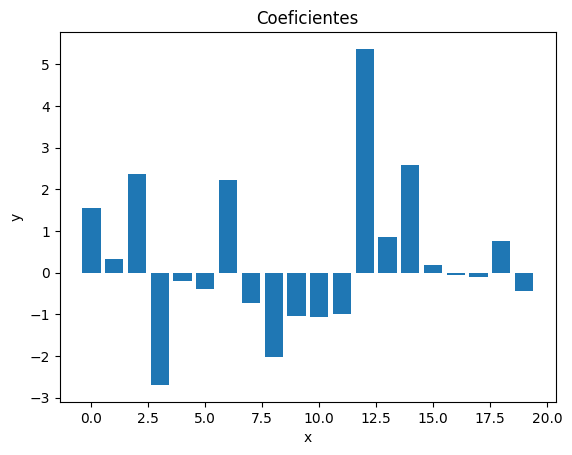

In [261]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [262]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.94136514, 0.20403559, 0.04231446, ..., 0.        , 0.        ,
        0.25      ],
       [0.93789501, 0.35089905, 0.11888399, ..., 0.        , 0.        ,
        0.5       ],
       [0.87472931, 0.32523871, 0.03928154, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.93915162, 0.19086587, 0.06105406, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.62013063, 0.95501503, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.72757326, 0.84252027, ..., 0.        , 0.        ,
        0.5       ]])

In [263]:
X_test.shape

(9818, 20)

In [264]:
predictions = model.predict(X_test)

In [265]:
test["predictions"]=predictions
test

,distancias,entropias,mutinf,max_info,sumas,entail,contra,neutral,no_match,rel_conceptuales,...,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
0,1.356523,0.643863,0.207092,0.230109,0.080601,0.250000,0.0,0.00,0.750000,0,...,0,0.811278,0.750000,9,0.250000,0,0,0.250000,neutral,0
1,1.351523,1.107311,0.581832,0.608876,0.228329,0.666667,0.0,0.00,0.333333,0,...,0,0.918296,0.333333,9,0.333333,0,0,0.500000,entailment,2
2,1.260500,1.026336,0.192248,0.187156,0.108534,0.250000,0.0,0.25,0.500000,1,...,0,1.500000,0.500000,9,0.250000,0,0,0.333333,contradiction,2
3,1.191664,0.085676,0.469892,0.355029,0.035923,0.500000,0.0,0.00,0.500000,0,...,0,1.000000,0.500000,8,0.500000,0,0,0.500000,neutral,0
4,1.153839,0.378398,0.553866,0.443783,0.046606,0.666667,0.0,0.00,0.333333,0,...,0,0.918296,0.333333,8,0.333333,0,0,0.500000,entailment,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,1.284206,1.121928,0.368725,0.359656,0.058824,0.400000,0.0,0.40,0.200000,2,...,0,1.521928,0.200000,4,0.400000,0,0,0.333333,contradiction,2
9814,0.000000,1.947339,4.141572,0.700668,0.221384,1.000000,0.0,0.00,0.000000,0,...,0,0.000000,0.000000,4,1.000000,0,0,0.333333,entailment,1
9815,1.353333,0.602304,0.298806,0.305267,0.038890,0.333333,0.0,0.00,0.666667,0,...,0,0.918296,0.666667,8,0.333333,0,0,0.333333,contradiction,0
9816,0.000000,1.956908,4.673955,1.000000,0.152691,1.000000,0.0,0.00,0.000000,0,...,0,0.000000,0.000000,8,0.666667,0,0,1.000000,entailment,1


In [266]:
test[(test["clases"]=="entailment") & (test["predictions"]==0)].head(10)

,distancias,entropias,mutinf,max_info,sumas,entail,contra,neutral,no_match,rel_conceptuales,...,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
10,1.218601,0.454593,0.309531,0.249242,0.096664,0.333333,0.000000,0.000000,0.666667,0,...,0,0.918296,0.666667,4,0.333333,0,1,0.500000,entailment,0
13,1.157738,0.283083,0.293493,0.224744,0.042261,0.333333,0.000000,0.000000,0.666667,0,...,0,0.918296,0.666667,4,0.666667,0,0,0.333333,entailment,0
27,1.129706,0.775515,0.654943,0.425395,0.098468,0.666667,0.000000,0.000000,0.333333,0,...,0,0.918296,0.333333,5,0.666667,0,0,0.000000,entailment,0
33,1.338143,0.362376,0.441242,0.447643,0.051784,0.500000,0.000000,0.000000,0.500000,0,...,0,1.000000,0.500000,6,0.500000,0,0,0.500000,entailment,0
43,0.000000,2.430941,4.329532,0.767966,0.179310,0.857143,0.142857,0.000000,0.000000,0,...,1,0.591673,0.000000,6,0.571429,0,0,0.500000,entailment,0
146,1.314968,0.784159,0.032465,0.115414,0.048205,0.500000,0.000000,0.000000,0.500000,0,...,0,1.000000,0.500000,6,0.500000,0,0,0.000000,entailment,0
160,0.999975,1.968943,3.387795,0.548286,0.125008,0.600000,0.200000,0.000000,0.200000,0,...,1,1.370951,0.200000,13,0.600000,0,1,0.333333,entailment,0
174,0.000000,1.410848,3.760663,0.236388,0.060831,0.333333,0.333333,0.333333,0.000000,1,...,1,1.584963,0.000000,6,0.000000,0,0,0.000000,entailment,0
200,0.999933,1.681714,3.344552,0.591235,0.106451,0.750000,0.000000,0.000000,0.250000,0,...,0,0.811278,0.250000,13,0.750000,0,0,0.333333,entailment,0
242,1.216037,-0.031439,0.003183,0.003727,0.009363,0.333333,0.000000,0.000000,0.666667,0,...,0,0.918296,0.666667,8,0.000000,0,0,0.000000,entailment,0


In [267]:

test[(test["clases"]=="neutral") & (test["predictions"]==2)].head(60)

,distancias,entropias,mutinf,max_info,sumas,entail,contra,neutral,no_match,rel_conceptuales,...,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
7,1.341912,0.784875,0.551129,0.690944,0.143118,0.800000,0.0,0.000000,0.200000,0,...,0,0.721928,0.200000,6,0.800000,0,0,0.600000,neutral,2
17,1.349087,0.559174,0.330932,0.404910,0.114318,0.666667,0.0,0.000000,0.333333,0,...,0,0.918296,0.333333,5,0.666667,0,0,0.333333,neutral,2
24,1.249702,0.291967,0.050850,0.203098,0.028907,0.625000,0.0,0.000000,0.375000,0,...,0,0.954434,0.375000,8,0.375000,0,0,0.000000,neutral,2
36,1.256530,0.316483,0.571231,0.504265,0.135577,0.714286,0.0,0.000000,0.285714,0,...,0,0.863121,0.285714,5,0.571429,0,0,0.500000,neutral,2
40,1.285460,0.350209,0.591768,0.550808,0.046307,0.666667,0.0,0.000000,0.333333,0,...,0,0.918296,0.333333,12,0.333333,0,0,0.666667,neutral,2
45,1.346778,1.665197,0.134449,0.266614,0.138788,0.400000,0.0,0.200000,0.400000,1,...,0,1.521928,0.400000,5,0.200000,0,0,0.250000,neutral,2
48,0.000000,1.967047,4.281566,0.633834,0.091225,0.750000,0.0,0.250000,0.000000,1,...,0,0.811278,0.000000,12,0.500000,0,0,0.666667,neutral,2
50,1.305502,0.472120,0.327336,0.316115,0.066092,0.714286,0.0,0.000000,0.285714,0,...,0,0.863121,0.285714,8,0.428571,0,0,0.250000,neutral,2
53,1.214541,0.362341,0.497446,0.442536,0.055086,0.600000,0.0,0.000000,0.400000,0,...,0,0.970951,0.400000,8,0.600000,0,0,0.333333,neutral,2
58,1.344125,0.912725,0.384321,0.462924,0.092730,0.500000,0.0,0.250000,0.250000,1,...,0,1.500000,0.250000,10,0.500000,0,0,0.333333,neutral,2


In [268]:
test[(test["clases"]=="contradiction") & (test["predictions"]==0)].head(60)

,distancias,entropias,mutinf,max_info,sumas,entail,contra,neutral,no_match,rel_conceptuales,...,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
5,1.356796,0.202820,0.410758,0.460233,0.074209,0.500000,0.000000,0.000000,0.500000,0,...,0,1.000000,0.500000,8,0.500000,0,0,0.000000,contradiction,0
11,1.329385,0.449386,0.216599,0.220938,0.084329,0.250000,0.000000,0.000000,0.750000,0,...,0,0.811278,0.750000,4,0.000000,0,0,0.250000,contradiction,0
15,0.664173,-0.098708,0.531387,-0.021499,-0.047394,0.750000,0.000000,0.000000,0.250000,0,...,0,0.811278,0.250000,5,0.500000,0,0,0.333333,contradiction,0
25,1.355098,0.144280,0.307556,0.306059,0.046027,0.333333,0.000000,0.000000,0.666667,0,...,0,0.918296,0.666667,8,0.333333,0,0,0.500000,contradiction,0
29,1.283268,1.069273,0.240322,0.312129,0.030297,0.333333,0.333333,0.000000,0.333333,0,...,1,1.584963,0.333333,5,0.333333,0,0,0.000000,contradiction,0
35,1.375700,0.056686,0.332760,0.315441,0.054594,0.333333,0.000000,0.000000,0.666667,0,...,0,0.918296,0.666667,6,0.333333,0,0,0.333333,contradiction,0
57,0.000000,2.021928,4.013151,0.546521,0.122444,0.500000,0.250000,0.250000,0.000000,1,...,1,1.500000,0.000000,10,0.000000,0,0,0.000000,contradiction,0
64,1.123925,0.695087,0.376698,0.378957,0.082923,0.750000,0.000000,0.000000,0.250000,0,...,0,0.811278,0.400000,5,0.600000,0,0,0.750000,contradiction,0
81,1.163952,0.126883,0.381614,0.169557,0.015131,0.666667,0.000000,0.000000,0.333333,0,...,0,0.918296,0.333333,21,0.666667,0,0,0.000000,contradiction,0
86,1.226120,-0.073363,0.034778,-0.013799,-0.003338,0.000000,0.000000,0.250000,0.750000,1,...,0,0.811278,0.750000,11,0.250000,0,0,0.000000,contradiction,0


In [269]:
print(confusion_matrix(y_test, predictions,labels=[1,2,0]))

[[1978 1067  321]
 [ 416 2033  768]
 [ 341 1387 1507]]


In [67]:
# [[1727 1388  251]
#  [ 294 2251  672]
#  [ 311 1435 1489]]
# [[2055 1018  293]
#  [ 454 2123  640]
#  [ 394 1415 1426]]
# [[1825 1302  239]
#  [ 300 2269  648]
#  [ 297 1471 1467]]
# [[1749 1293  324]
#  [ 311 2390  516]
#  [ 320 1617 1298]]

In [122]:
# [[1985  959  422]
#  [ 425 2084  708]
#  [ 397 1251 1587]]

In [123]:
# [[2143  728  495]
#  [ 572 1562 1083]
#  [ 495  822 1918]]
# [[2131  812  423]
#  [ 483 1946  788]
#  [ 514 1175 1546]]
# [[1780  676  910]
#  [ 294  932 1991]
#  [ 229  643 2363]]
# [[1773 1181  412]
#  [ 288 2229  700]
#  [ 224 1646 1365]]
# acccuracy:  0.57
# precision:  0.61
# recall 0.57
# f1_score:  0.57
# matthews_score:  0.37

In [270]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.56
precision:  0.59
recall 0.56


f1_score:  0.57
matthews_score:  0.35


In [ ]:
# acccuracy:  0.56
# precision:  0.6
# recall 0.56
# f1_score:  0.56
# matthews_score:  0.35

In [69]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="macro"),2))
print("recall",round(recall_score(y_test,predictions,average="macro"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="macro"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.56
precision:  0.6
recall 0.56
f1_score:  0.56
matthews_score:  0.35


In [70]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.56
precision:  0.6
recall 0.56
f1_score:  0.56
matthews_score:  0.35


In [71]:
X_train.shape

(549367, 28)

In [72]:
X_test.shape

(9818, 28)

In [73]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [74]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [75]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.570000 (0.002164)


In [74]:
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.570000 (0.015220)


In [75]:
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg = "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Recall:: 0.570000 (0.012470)
Logistic Regression F1-score:: 0.570000 (0.014008)


In [76]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

In [ ]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.580000 (0.012404)
Logistic Regression Recall:: 0.580000 (0.012404)
Logistic Regression F1-score:: 0.580000 (0.012404)


In [ ]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

In [271]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [66]:
#linear_model

In [67]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [272]:
y_predict = model.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52      3235
           1       0.72      0.59      0.65      3366
           2       0.45      0.63      0.53      3217

    accuracy                           0.56      9818
   macro avg       0.59      0.56      0.56      9818
weighted avg       0.59      0.56      0.57      9818

[[1507  341 1387]
 [ 321 1978 1067]
 [ 768  416 2033]]


In [ ]:
#            0       0.62      0.46      0.53      3235
#            1       0.74      0.51      0.61      3366
#            2       0.44      0.70      0.54      3217

#     accuracy                           0.56      9818
#    macro avg       0.60      0.56      0.56      9818
# weighted avg       0.60      0.56      0.56      9818

# [[1489  311 1435]
#  [ 251 1727 1388]
#  [ 672  294 2251]]

In [ ]:
#   precision    recall  f1-score   support

#            0       0.58      0.28      0.38      3235
#            1       0.71      0.59      0.65      3366
#            2       0.45      0.77      0.57      3217

#     accuracy                           0.54      9818
#    macro avg       0.58      0.54      0.53      9818
# weighted avg       0.58      0.54      0.53      9818
#  precision    recall  f1-score   support

#            0       0.58      0.28      0.38      3235
#            1       0.71      0.59      0.65      3366
#            2       0.45      0.77      0.57      3217

#     accuracy                           0.54      9818
#    macro avg       0.58      0.54      0.53      9818
# weighted avg       0.58      0.54      0.53      9818

In [ ]:
#               precision    recall  f1-score   support

#            0       0.59      0.29      0.39      3235
#            1       0.72      0.59      0.64      3366
#            2       0.45      0.77      0.57      3217

#     accuracy                           0.55      9818
#    macro avg       0.59      0.55      0.53      9818
# weighted avg       0.59      0.55      0.54      9818

In [273]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [274]:
test.columns[:-2]

Index(['distancias', 'entropias', 'mutinf', 'max_info', 'sumas', 'entail',
       'contra', 'neutral', 'no_match', 'rel_conceptuales', 'list_comp',
       'diferencias', 'list_incomp', 'entropia_relaciones', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [275]:
explainer.expected_value

array([-0.84874776, -0.93805858, -0.7247547 ])

In [276]:
X_test

array([[0.94136514, 0.20403559, 0.04231446, ..., 0.        , 0.        ,
        0.25      ],
       [0.93789501, 0.35089905, 0.11888399, ..., 0.        , 0.        ,
        0.5       ],
       [0.87472931, 0.32523871, 0.03928154, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.93915162, 0.19086587, 0.06105406, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.62013063, 0.95501503, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.72757326, 0.84252027, ..., 0.        , 0.        ,
        0.5       ]])

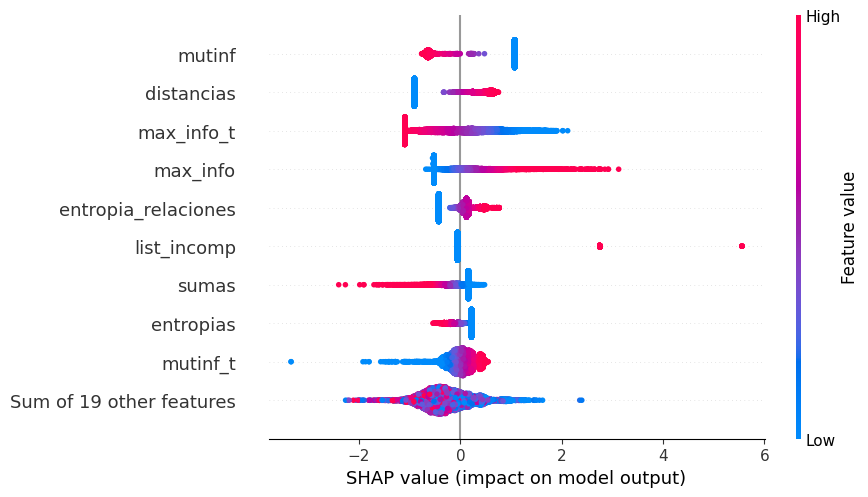

In [74]:
shap.plots.beeswarm(shap_values[:,:,0])

In [94]:
shap_values

.values =
array([[[ 0.65533106,  0.20698347, -0.6274937 ],
        [-0.00651386,  0.00254711, -0.0202789 ],
        [-0.05534794,  0.01460769,  0.04602571],
        ...,
        [-0.        , -0.        ,  0.        ],
        [ 0.        ,  0.        , -0.        ],
        [ 0.05461241, -0.05102555, -0.00680332]],

       [[ 0.649568  ,  0.20516324, -0.62197545],
        [ 0.03398262, -0.01328822,  0.10579443],
        [-0.20949088,  0.05528984,  0.1742064 ],
        ...,
        [-0.        , -0.        ,  0.        ],
        [ 0.        ,  0.        , -0.        ],
        [-0.04606004,  0.04303489,  0.00573791]],

       [[ 0.54466478,  0.17203001, -0.52152834],
        [ 0.00904271, -0.00353597,  0.02815169],
        [-0.05741733,  0.01515386,  0.04774655],
        ...,
        [-0.        , -0.        ,  0.        ],
        [ 0.        ,  0.        , -0.        ],
        [ 0.02105492, -0.01967207, -0.00262291]],

       ...,

       [[ 0.65165493,  0.20582238, -0.62397372],
 

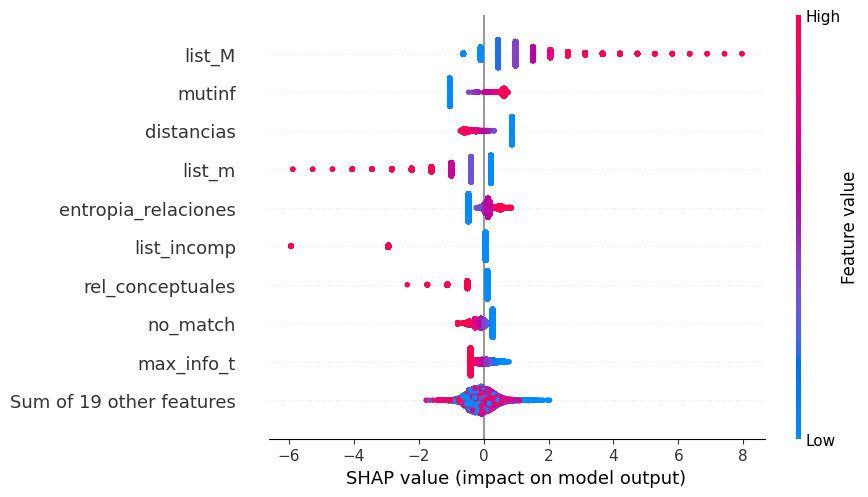

In [95]:
shap.plots.beeswarm(shap_values[:,:,2])

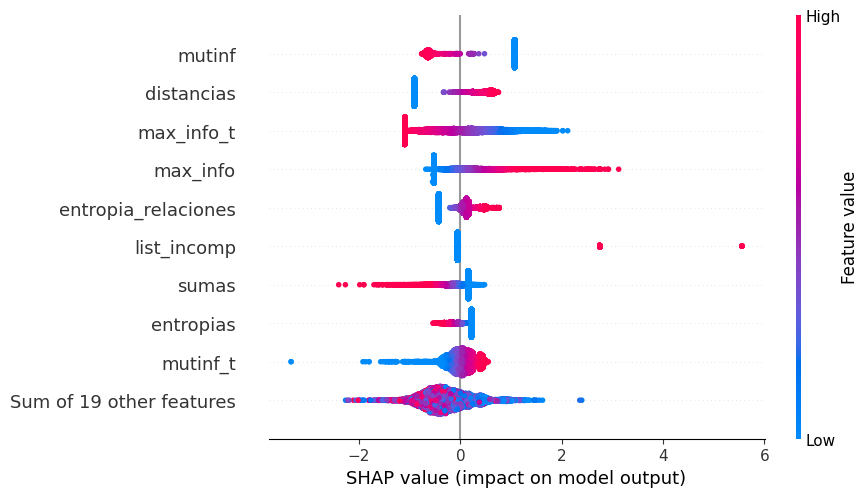

In [96]:
shap.plots.beeswarm(shap_values[:,:,0])

In [63]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.23912561 0.52693283 0.09193841 0.81246962 0.1        0.01923077
 0.33333333 0.17647059 0.11111111 0.46428571 0.66666667 0.
 0.         0.25      ] 0 0


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

In [122]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.         0.         0.         0.
 0.25925926 0.         0.31428571 0.33333333 0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

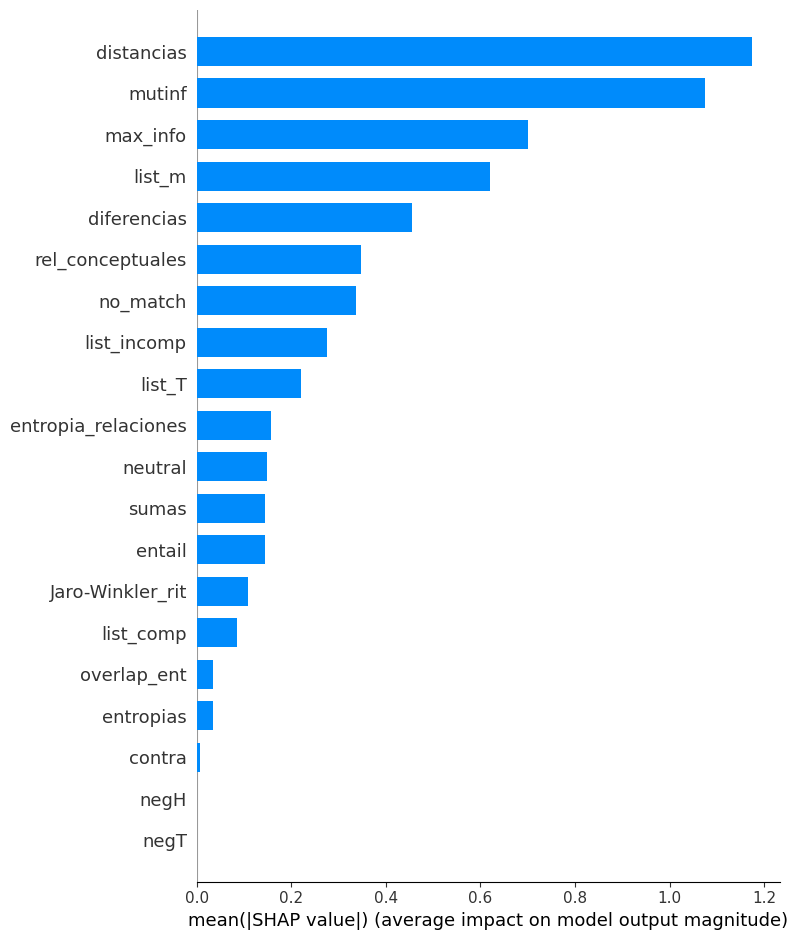

In [277]:
shap.summary_plot(shap_values[:,:,1], X_test,plot_type="bar")

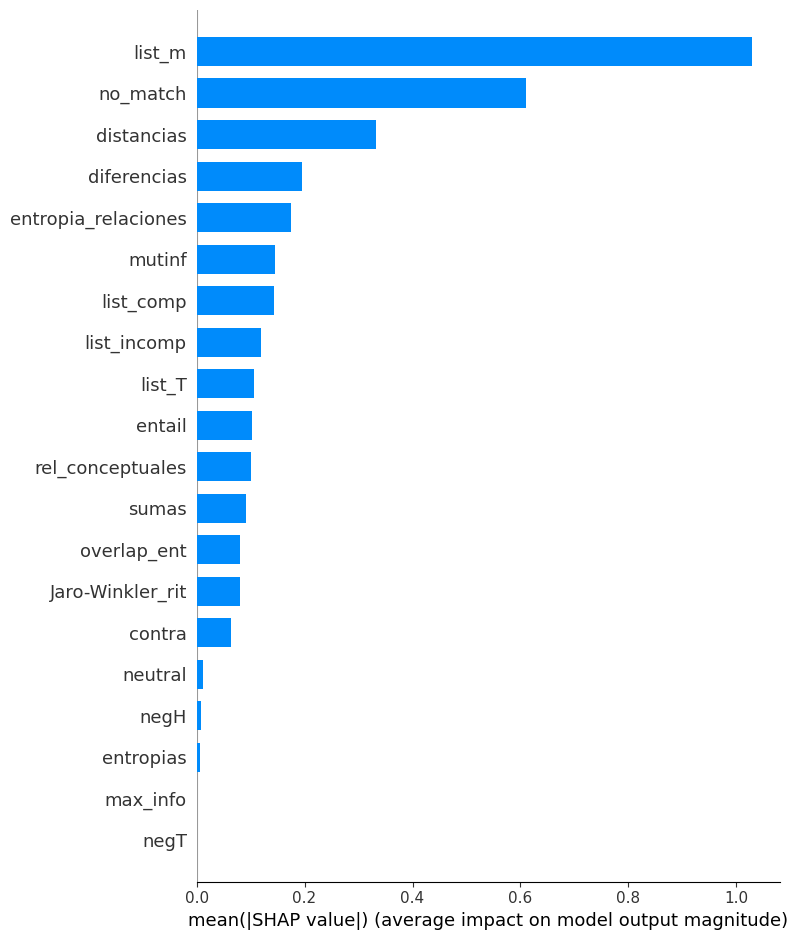

In [278]:
shap.summary_plot(shap_values[:,:,2], X_test,plot_type="bar")

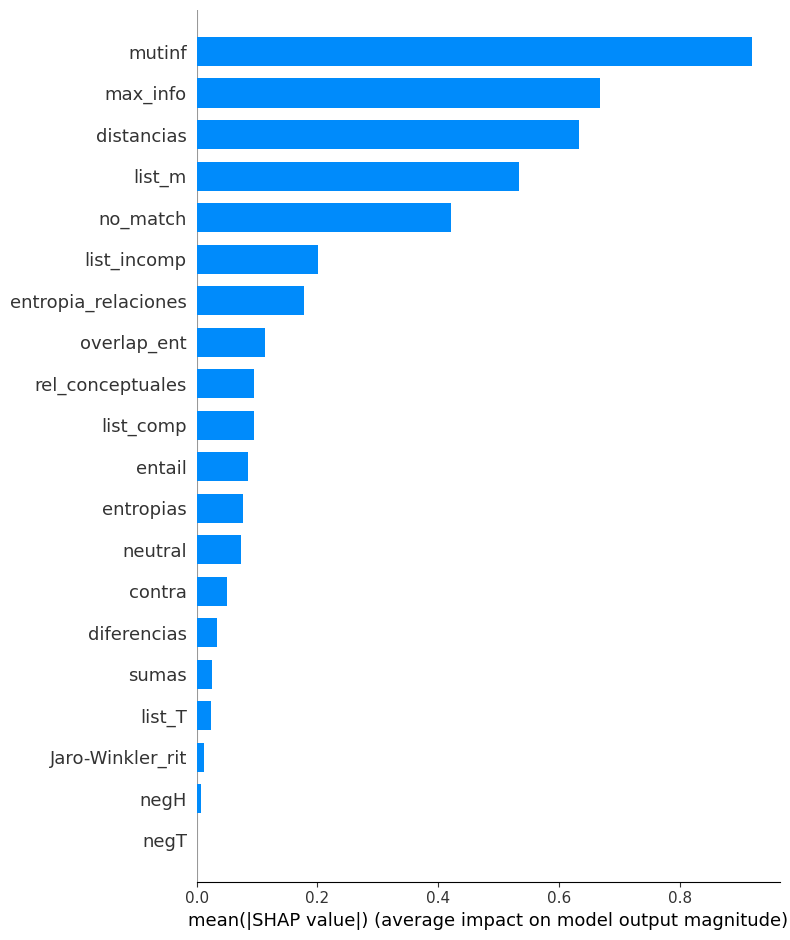

In [280]:
shap.summary_plot(shap_values[:,:,0], X_test,plot_type="bar")

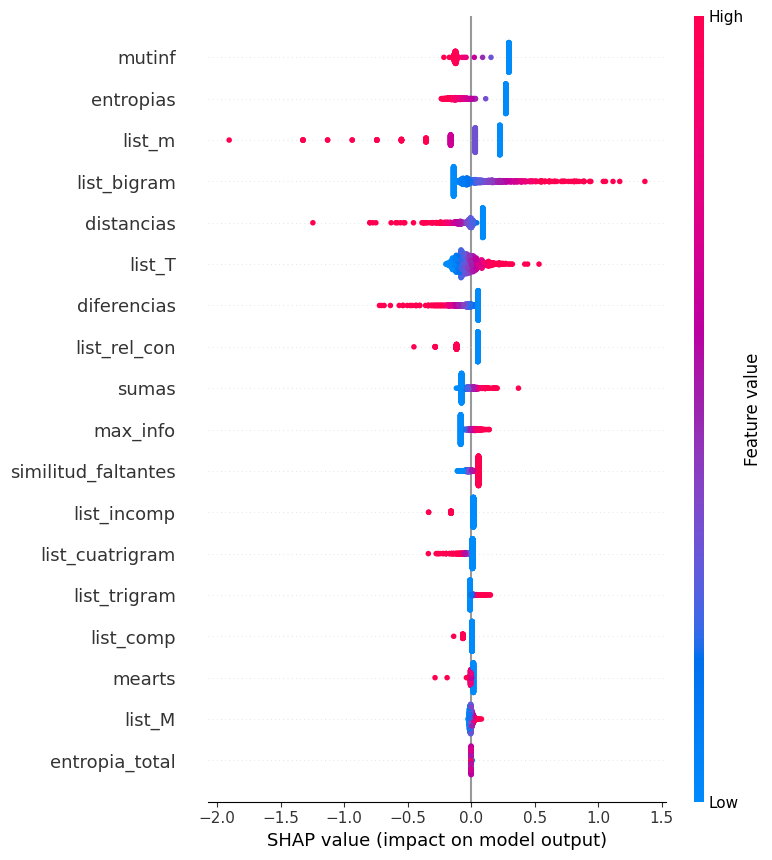

In [81]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

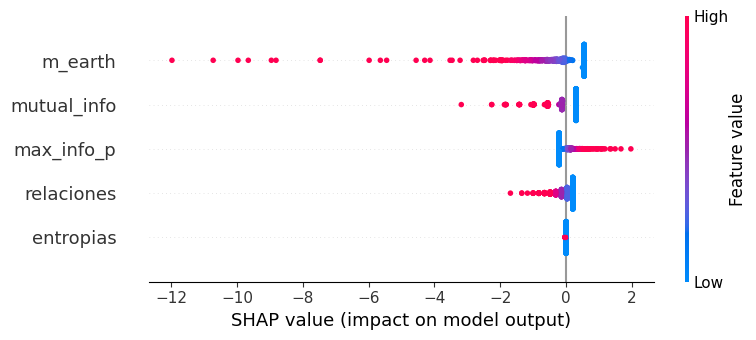

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

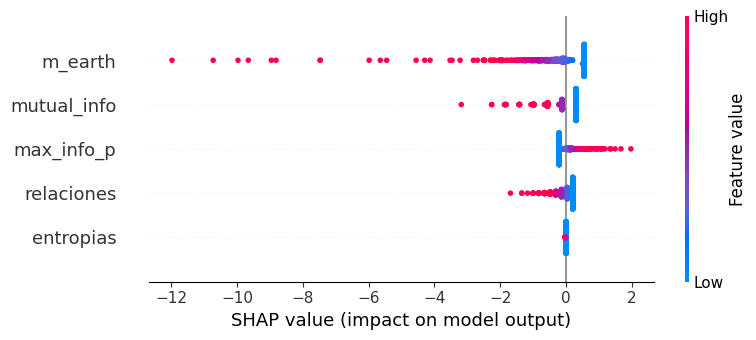

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


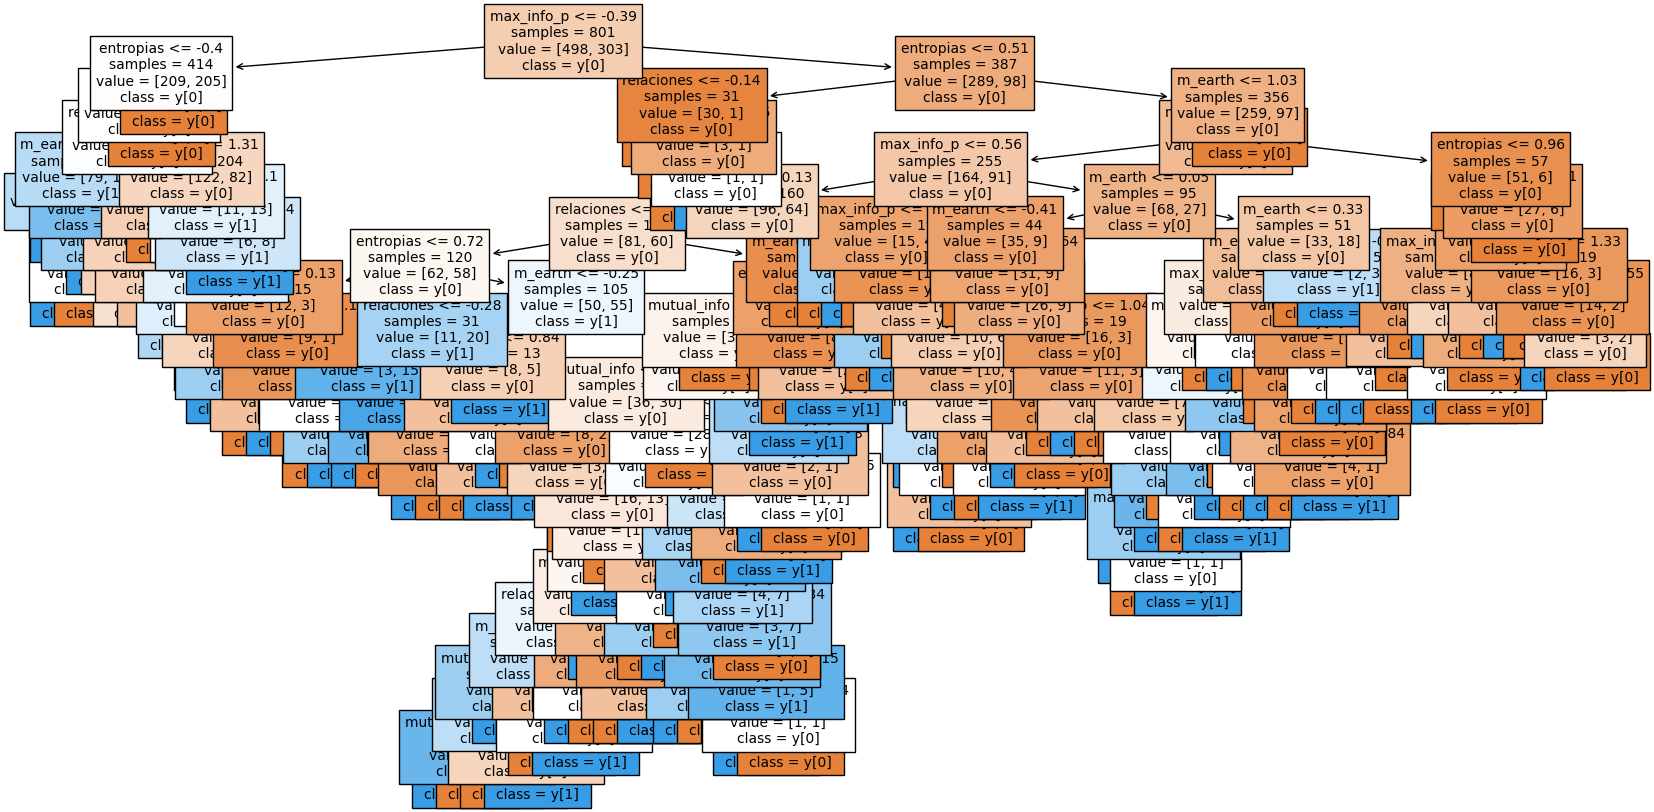

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )